Class 4

In [ ]:
# prompt: read this file from my colab Wavetronix.csv

from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Assuming the uploaded file is named 'Wavetronix.csv'
df = pd.read_csv(io.BytesIO(uploaded['Wavetronix.csv']))

print(df.head())


Saving Wavetronix.csv to Wavetronix.csv
   day                 Time  WAVE-NE-Count  WAVE-NE-Speed  WAVE-SW-Count  \
0    1  2022-07-10 00:00:00            NaN            NaN            3.0   
1    1  2022-07-10 00:01:00           10.0           62.0            2.0   
2    1  2022-07-10 00:02:00            5.0           63.6            4.0   
3    1  2022-07-10 00:03:00           11.0           58.2            9.0   
4    1  2022-07-10 00:04:00           19.0           60.2           17.0   

   WAVE-SW-Speed  Month  Year  
0           59.5     10  2021  
1           59.0     10  2021  
2           58.4     10  2021  
3           60.0     10  2021  
4           61.2     10  2021  


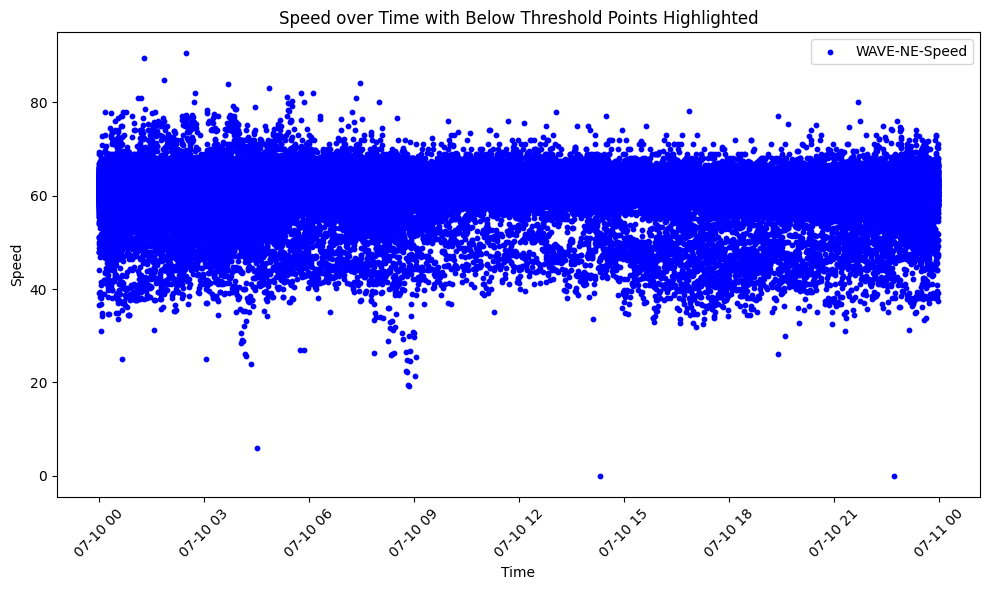

In [ ]:
# prompt: plot  it speed in time

import matplotlib.pyplot as plt
# Scatter plot without joining points
plt.figure(figsize=(10, 6))

# Scatter plot for WAVE-NE-Speed and WAVE-SW-Speed
plt.scatter(df['Time'], df['WAVE-NE-Speed'], label='WAVE-NE-Speed', color='blue', s=10)
# plt.scatter(df['Time'], df['WAVE-SW-Speed'], label='WAVE-SW-Speed', color='green', s=10)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed over Time with Below Threshold Points Highlighted')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Now that we have the data, let's define a static threshold and count the number of times the speed drops below it.

# Define threshold
threshold = 20

# Filter the rows where WAVE-NE-Speed or WAVE-SW-Speed is below the threshold
below_threshold_ne = df['WAVE-NE-Speed'] < threshold
below_threshold_sw = df['WAVE-SW-Speed'] < threshold

# Count the number of such events
count_ne = below_threshold_ne.sum()
count_sw = below_threshold_sw.sum()

# Output the result
count_ne, count_sw


(5, 84)

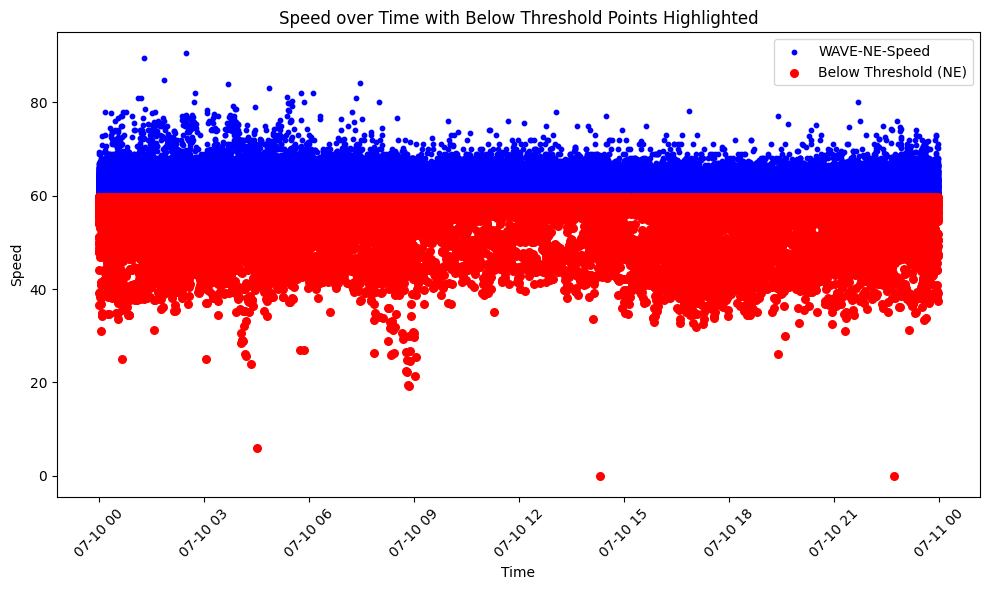

In [ ]:
# Convert 'Time' column to datetime format for plotting
df['Time'] = pd.to_datetime(df['Time'])

# Define threshold for marking the data points
threshold = 60

# Filter the rows where WAVE-NE-Speed or WAVE-SW-Speed is below the threshold
below_threshold_ne = df['WAVE-NE-Speed'] < threshold
below_threshold_sw = df['WAVE-SW-Speed'] < threshold

# Scatter plot without joining points
plt.figure(figsize=(10, 6))

# Scatter plot for WAVE-NE-Speed and WAVE-SW-Speed
plt.scatter(df['Time'], df['WAVE-NE-Speed'], label='WAVE-NE-Speed', color='blue', s=10)
# plt.scatter(df['Time'], df['WAVE-SW-Speed'], label='WAVE-SW-Speed', color='green', s=10)

# Highlight the regions where speed drops below the threshold
plt.scatter(df['Time'][below_threshold_ne], df['WAVE-NE-Speed'][below_threshold_ne],
            color='red', s=30, label='Below Threshold (NE)')
# plt.scatter(df['Time'][below_threshold_sw], df['WAVE-SW-Speed'][below_threshold_sw],
#             color='orange', s=30, label='Below Threshold (SW)')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed over Time with Below Threshold Points Highlighted')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

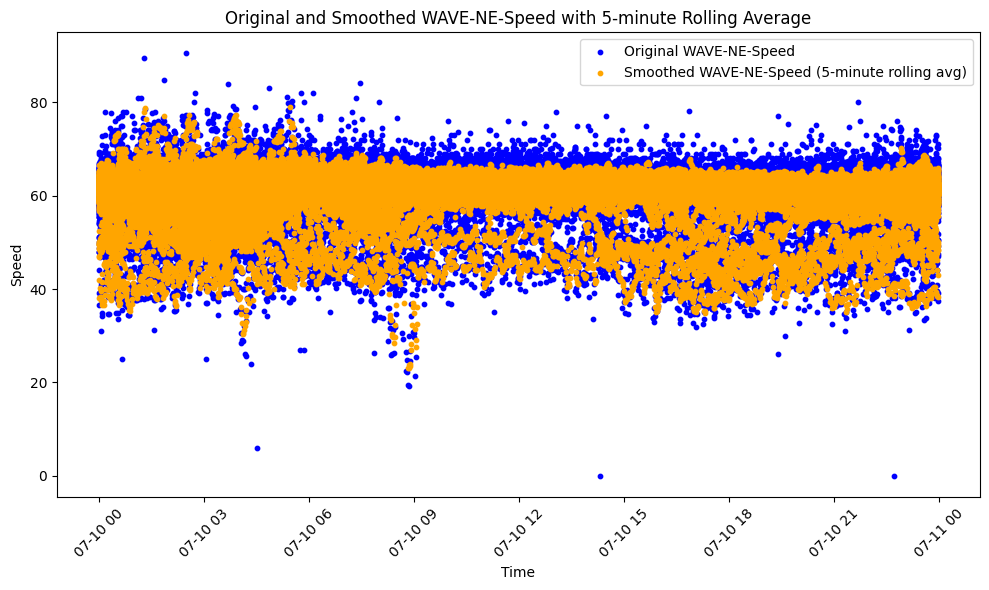

In [ ]:
# Apply a 5-minute rolling average for smoothing the sensor data of activity 0 (assuming it refers to WAVE-NE-Speed)
df['WAVE-NE-Speed-Rolling'] = df['WAVE-NE-Speed'].rolling(window=5).mean()

# Plotting the original and smoothed data using a scatter plot for WAVE-NE-Speed
plt.figure(figsize=(10, 6))

# Original scatter plot for WAVE-NE-Speed
plt.scatter(df['Time'], df['WAVE-NE-Speed'], label='Original WAVE-NE-Speed', color='blue', s=10)

# Smoothed data (5-minute rolling average)
plt.scatter(df['Time'], df['WAVE-NE-Speed-Rolling'], label='Smoothed WAVE-NE-Speed (5-minute rolling avg)', color='orange', s=10)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Original and Smoothed WAVE-NE-Speed with 5-minute Rolling Average')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Check for missing data in the speed columns (WAVE-NE-Speed, WAVE-SW-Speed)
missing_ne_speed = df['WAVE-NE-Speed'].isnull().sum()
missing_sw_speed = df['WAVE-SW-Speed'].isnull().sum()

In [ ]:
# Step 2: Fill missing values using interpolation
df['WAVE-NE-Speed'] = df['WAVE-NE-Speed'].interpolate(method='linear')
df['WAVE-SW-Speed'] = df['WAVE-SW-Speed'].interpolate(method='linear')

In [ ]:
#df['WAVE-NE-Speed']

In [ ]:
# Step 3: Check for and remove duplicate rows
df_cleaned = df.drop_duplicates()

In [ ]:
# Step 4: Remove any speed values that fall outside a reasonable range (e.g., negative or above 150)
reasonable_range = (df_cleaned['WAVE-NE-Speed'] >= 0) & (df_cleaned['WAVE-NE-Speed'] <= 150)
df_cleaned = df_cleaned[reasonable_range]

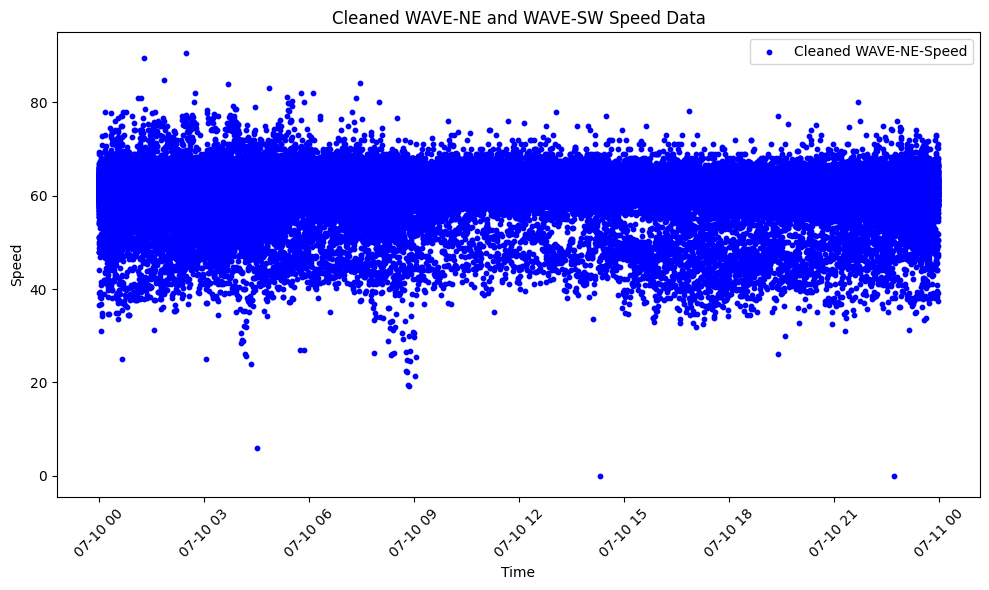

In [ ]:
# Step 5: Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Time'], df_cleaned['WAVE-NE-Speed'], label='Cleaned WAVE-NE-Speed', color='blue', s=10)
# plt.scatter(df_cleaned['Time'], df_cleaned['WAVE-SW-Speed'], label='Cleaned WAVE-SW-Speed', color='green', s=10)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Cleaned WAVE-NE and WAVE-SW Speed Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

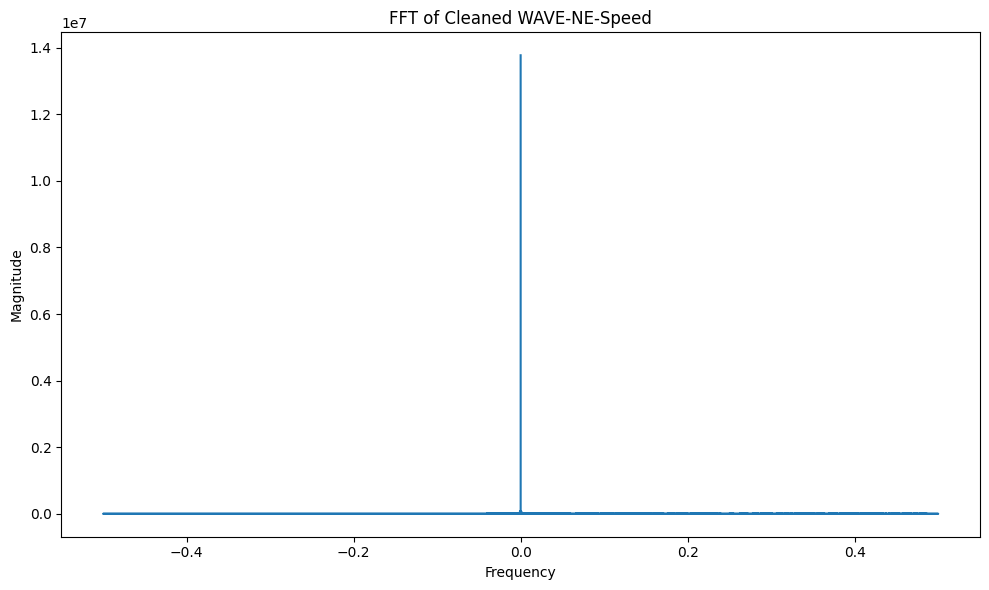

In [ ]:
# # Filtering the data for the 10th day of the month
# df_filtered = df_cleaned[df_cleaned['Time'].dt.day == 10]

# # Verify the filter by showing the first few rows
# df_filtered.head()


# Step 6: Apply Fast Fourier Transform (FFT) to the cleaned WAVE-NE-Speed data
import numpy as np

# Perform FFT on the cleaned WAVE-NE-Speed
fft_ne_speed = np.fft.fft(df_cleaned['WAVE-NE-Speed'].values)
fft_freqs = np.fft.fftfreq(len(fft_ne_speed), d=1)

# Plot the FFT result (magnitude of FFT)
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_ne_speed))
plt.title('FFT of Cleaned WAVE-NE-Speed')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

In [ ]:
!pip install PyWavelets

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.8 MB/s eta 0:00:00


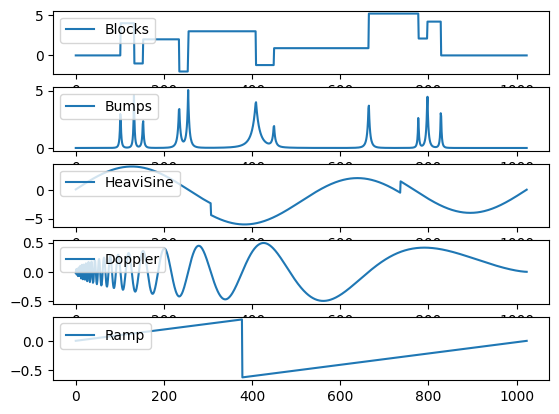

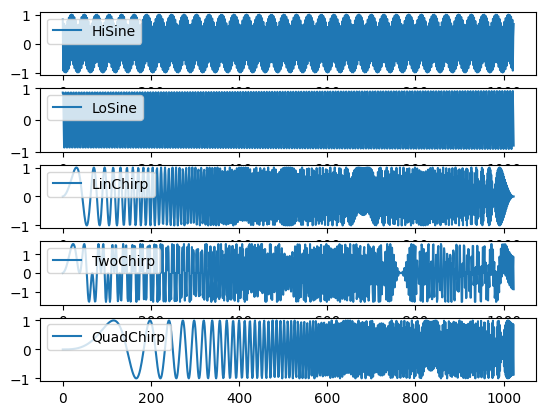

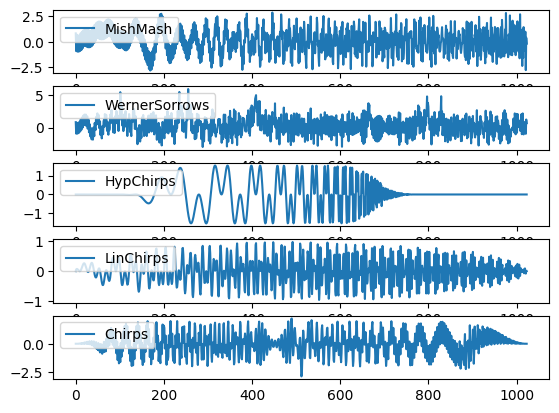

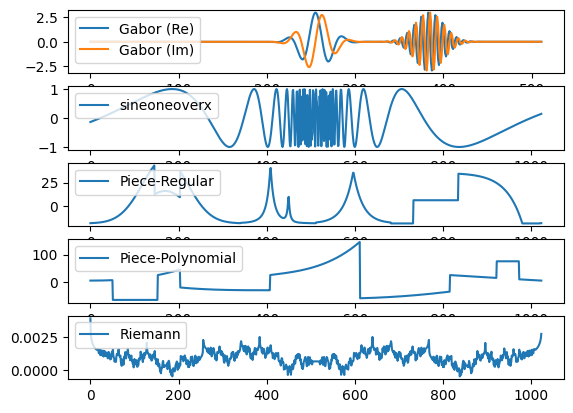

In [ ]:
#!/usr/bin/env python

"""Plot the  set of 1D demo signals available in `pywt.data.demo_signal`."""

import matplotlib.pyplot as plt
import numpy as np

import pywt

# use 'list' to get a list of all available 1d demo signals
signals = pywt.data.demo_signal('list')

subplots_per_fig = 5
signal_length = 1024
i_fig = 0
n_figures = int(np.ceil(len(signals)/subplots_per_fig))
for i_fig in range(n_figures):
    # Select a subset of functions for the current plot
    func_subset = signals[
        i_fig * subplots_per_fig:(i_fig + 1) * subplots_per_fig]

    # create a figure to hold this subset of the functions
    fig, axes = plt.subplots(subplots_per_fig, 1)
    axes = axes.ravel()
    for n, signal in enumerate(func_subset):
        if signal in ['Gabor', 'sineoneoverx']:
            # user cannot specify a length for these two
            x = pywt.data.demo_signal(signal)
        else:
            x = pywt.data.demo_signal(signal, signal_length)
        ax = axes[n]
        ax.plot(x.real)
        if signal == 'Gabor':
            # The Gabor signal is complex-valued
            ax.plot(x.imag)
            ax.legend(['Gabor (Re)', 'Gabor (Im)'], loc='upper left')
        else:
            ax.legend([signal, ], loc='upper left')
    # omit axes for any unused subplots
    for n in range(n + 1, len(axes)):
        axes[n].set_axis_off()
plt.show()

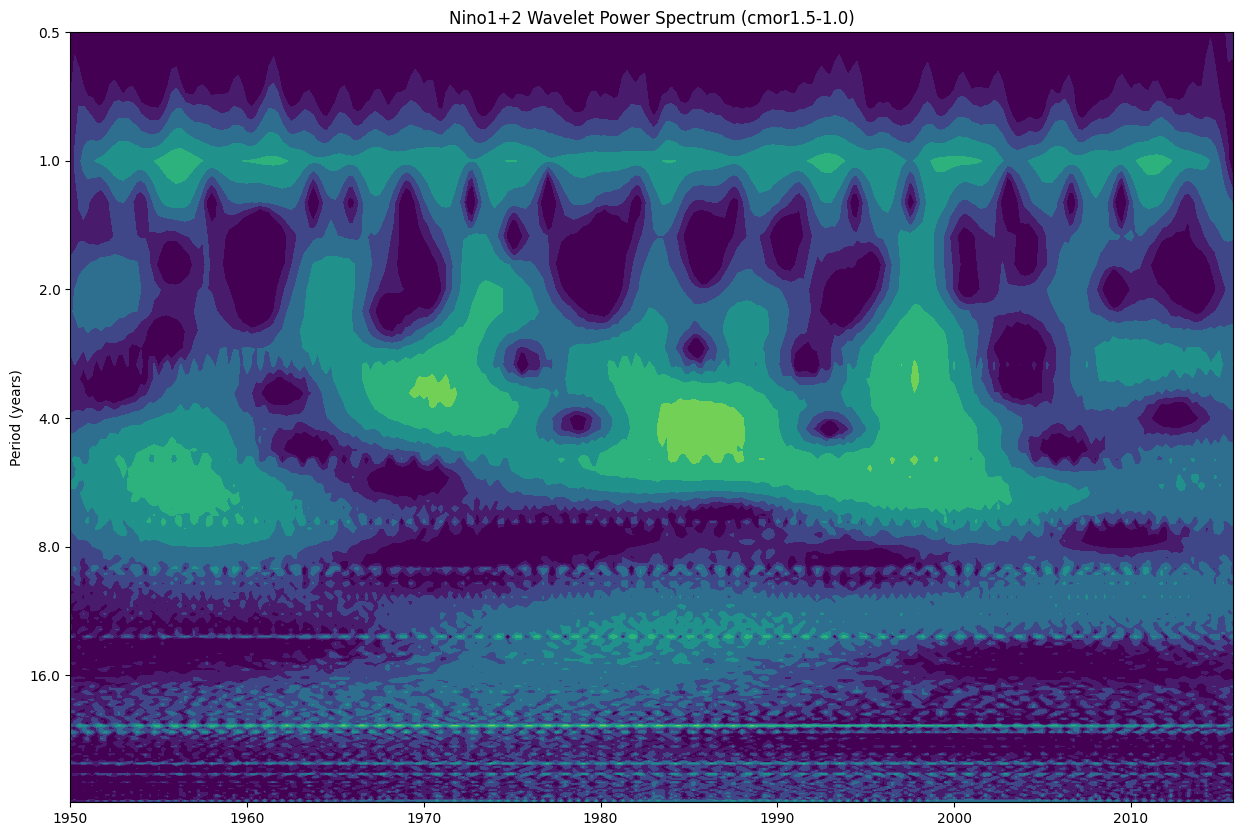

In [ ]:
#!/usr/bin/env python

import matplotlib.pyplot as plt
import numpy as np

import pywt

time, sst = pywt.data.nino()
dt = time[1] - time[0]

# Taken from http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title(f'Nino1+2 Wavelet Power Spectrum ({wavelet})')
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

plt.show()

In [ ]:
## Act 3

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Extract the WAVE-NE-Speed column for the analysis
signal = df_cleaned['WAVE-NE-Speed'].values

# Define scales (these control the resolution of the wavelet transform)
scales = np.arange(1, 128)

# Apply the CWT with the 'mexh' wavelet
coefficients, frequencies = pywt.cwt(signal, scales, 'mexh')


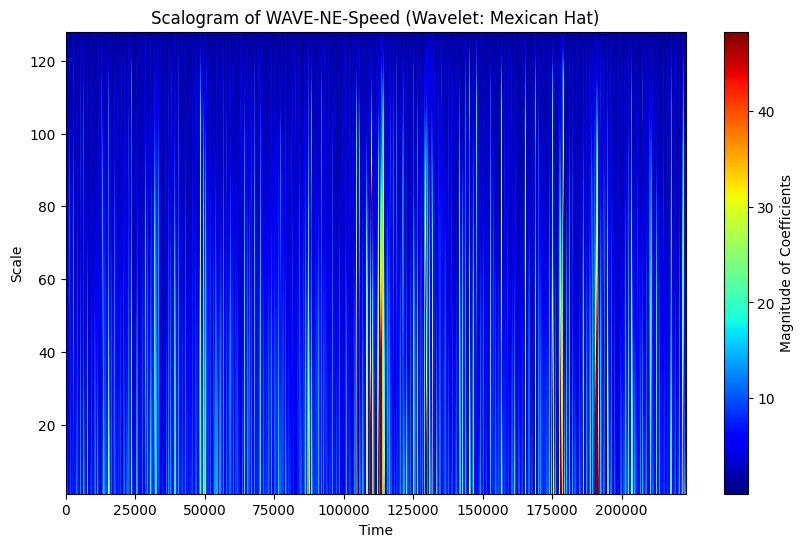

In [ ]:
plt.figure(figsize=(10, 6))

# Create a heatmap of the wavelet coefficients
plt.imshow(np.abs(coefficients), extent=[0, len(signal), 1, 128], cmap='jet', aspect='auto',
           vmax=np.percentile(np.abs(coefficients), 99))  # Adjust the color scale for visibility

plt.colorbar(label='Magnitude of Coefficients')
plt.title('Scalogram of WAVE-NE-Speed (Wavelet: Mexican Hat)')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()


In [ ]:
### Act 4

In [ ]:
!pip install requests Pillow PyWavelets


In [ ]:
import requests

# URL of the image
url = 'https://github.com/barkham21/ai4ccee_fall_2024/blob/main/in_class_activity/lecture4/2018-06-30-19-05.jpg?raw=true'

# Send a GET request to the URL and save the image
response = requests.get(url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)


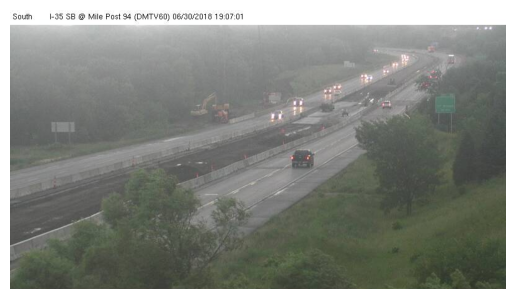

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('image.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
import numpy as np

# Convert the image to grayscale (optional, you can also work with color)
img_gray = img.convert('L')

# Convert to NumPy array
img_array = np.array(img_gray)


In [ ]:
import pywt

# Perform 2D Discrete Wavelet Transform using the 'haar' wavelet
coeffs2 = pywt.dwt2(img_array, 'haar')

# Unpack the coefficients (LL: Approximation, LH: Horizontal, HL: Vertical, HH: Diagonal)
LL, (LH, HL, HH) = coeffs2


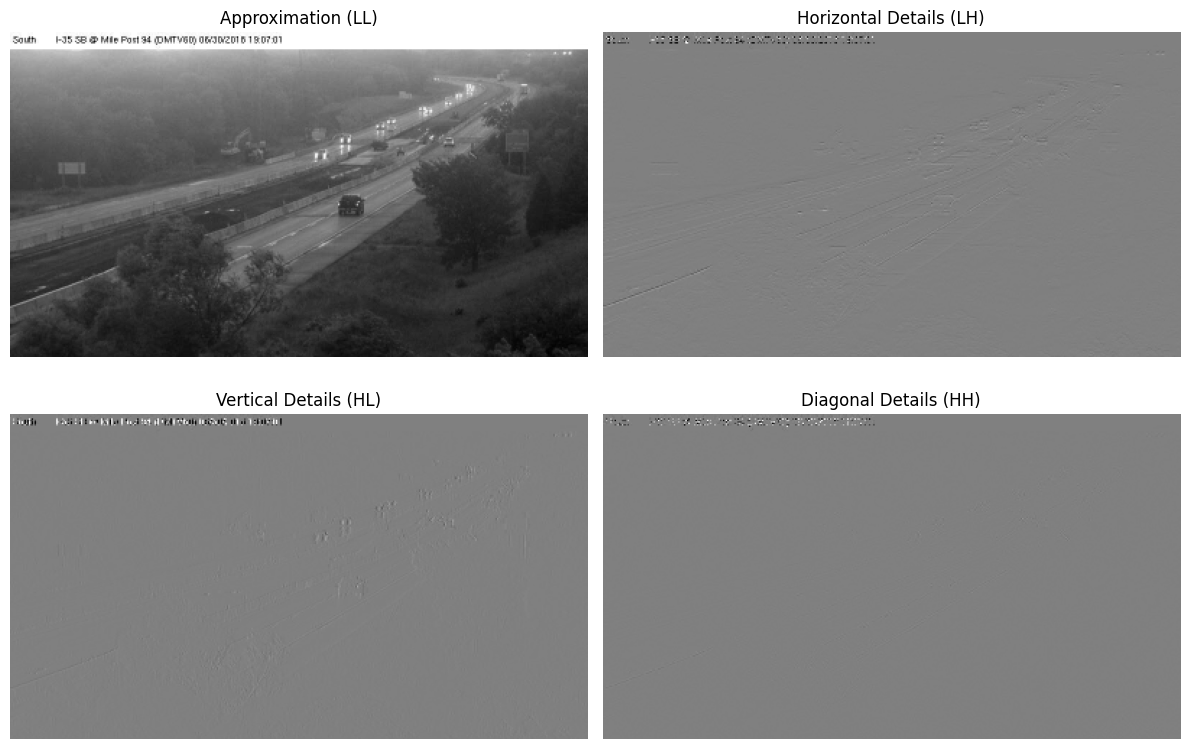

In [ ]:
plt.figure(figsize=(12, 8))

# Plot the approximation coefficients (LL)
plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

# Plot the horizontal detail coefficients (LH)
plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Details (LH)')
plt.axis('off')

# Plot the vertical detail coefficients (HL)
plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Details (HL)')
plt.axis('off')

# Plot the diagonal detail coefficients (HH)
plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Details (HH)')
plt.axis('off')

plt.tight_layout()
plt.show()
